In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv', encoding='utf-8')
test = pd.read_csv('test.csv', encoding='utf-8')

In [3]:
train['Target'] = (train.Stage=='Closed Won').astype(int)
train['Target'].value_counts()

1    9533
0    7414
Name: Target, dtype: int64

In [4]:
train.columns

Index(['ID', 'Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source ',
       'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currenc

In [5]:
from matplotlib import pyplot as plt

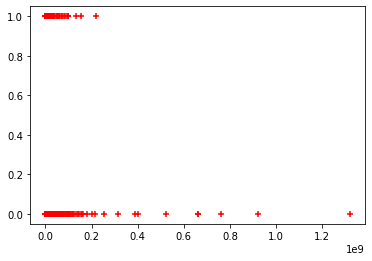

In [6]:
plt.scatter(train['Total_Amount'], train['Target'], marker='+', color='red')

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model = LogisticRegression()

In [20]:
train.dropna(inplace=True)

In [21]:
model.fit(train['Total_Amount'].to_frame(), train['Target'].to_frame())

C:\Users\renzo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [23]:
test['Target'] = model.predict(test['Total_Amount'].to_frame())

In [25]:
model.score(test['Total_Amount'].to_frame(), test['Target'].to_frame())

1.0

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(test['Total_Amount'], test['Target'])

ValueError: Classification metrics can't handle a mix of continuous and binary targets